# Facebook Ad-Campaign Analysis

In [1]:
import pandas as pd

df = pd.read_csv('sales-data.csv')
df.head(3)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0


According to the author:

 - ad_id: an unique ID for each ad.

 - xyzcampaignid: an ID associated with each ad campaign of XYZ company.

 - fbcampaignid: an ID associated with how Facebook tracks each campaign.

 - age: age of the person to whom the ad is shown.

 - gender: gender of the person to whim the add is shown

 - interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

 - Impressions: the number of times the ad was shown.

 - Clicks: number of clicks on for that ad.

 - Spent: Amount paid by company xyz to Facebook, to show that ad.

 - Total conversion: Total number of people who enquired about the product after seeing the ad.

 - Approved conversion: Total number of people who bought the product after seeing the ad.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [3]:
df.shape

(1143, 11)

Since there each column has a 1143 non-null count and there are 1143 rows in the dataset there are non null values in the data to clean/fill.

In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


 - Min sales per ad is 0
 - Max sales per ad is 21
 - Conversion rate between clicking on the ad and buying the product is roughly 3%
 - Conversion rate between enquiring and selling is roughly 33%

Lets create a group of categorical and continuous data

In [5]:
categorical = [cname for cname in df.columns if df[cname].dtype == 'object']
categorical.append('interest')
categorical

['age', 'gender', 'interest']

In [6]:
numerical = [cname for cname in df.columns if df[cname].dtype != 'object']
del numerical[3]
numerical

['ad_id',
 'xyz_campaign_id',
 'fb_campaign_id',
 'Impressions',
 'Clicks',
 'Spent',
 'Total_Conversion',
 'Approved_Conversion']

Lets view the correlations between the data

Text(0.5, 1.0, 'Numerical correlations')

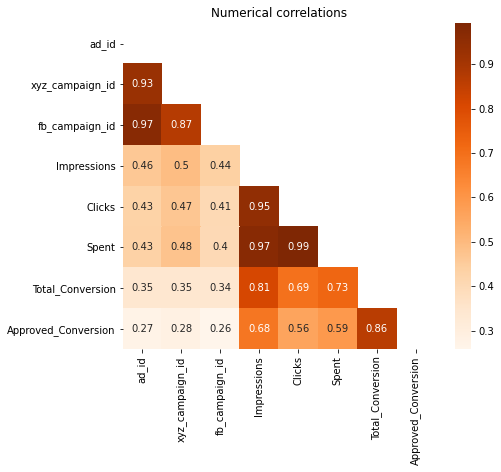

In [20]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

corr = df[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(7, 6))
cor_heatmap = sns.heatmap(corr, mask=mask, annot=True, cmap='Oranges')
cor_heatmap.set_title('Numerical correlations')

Strong correlations between:
 - Clicks and Impressions
 - Spent and Impressions
 - Spent and Clicks
 - Total_Conversion and Impressions
 - Total_Conversion and Clicks
 - Total_Conversion and Spent
 - Approved_Conversion and Impressions
 - Approved_Conversion and Clicks
 - Approved_Conversion and Spent
 - Approved_Conversion and Total_Conversion

Text(0.5, 1.0, 'Frequency of campaign IDs')

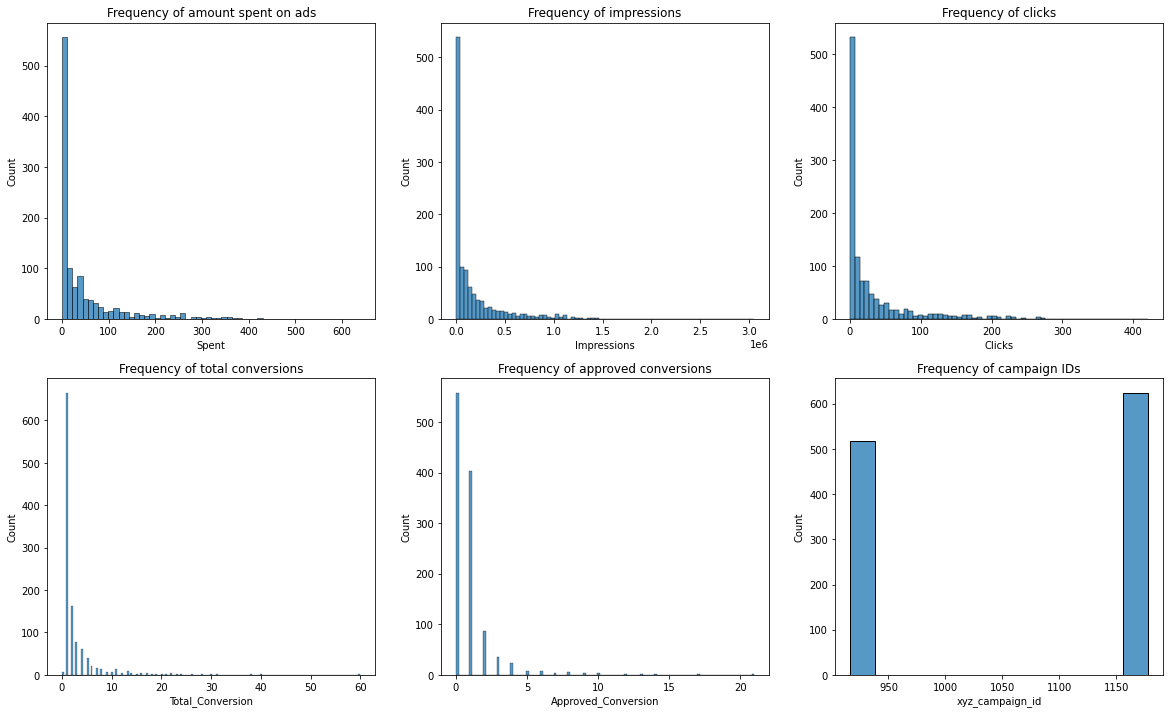

In [63]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 12)

spent_hist = sns.histplot(x='Spent', data=df, ax=axs[0][0])
spent_hist.set_title('Frequency of amount spent on ads')

spent_hist = sns.histplot(x='Impressions', data=df, ax=axs[0][1])
spent_hist.set_title('Frequency of impressions')

spent_hist = sns.histplot(x='Clicks', data=df, ax=axs[0][2])
spent_hist.set_title('Frequency of clicks')

spent_hist = sns.histplot(x='Total_Conversion', data=df, ax=axs[1][0])
spent_hist.set_title('Frequency of total conversions')

spent_hist = sns.histplot(x='Approved_Conversion', data=df, ax=axs[1][1])
spent_hist.set_title('Frequency of approved conversions')

spent_hist = sns.histplot(x='xyz_campaign_id', data=df, ax=axs[1][2])
spent_hist.set_title('Frequency of campaign IDs')

Most of the distributions are zero centered, except for the campaign ID frequency which seems to have 2 distinctive peaks, meaning that the campaign ID's appear categorical rather than continuous.

### Who are clicking on the products?

Find out the ages and genders that are clicking on the products.

/home/ben/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


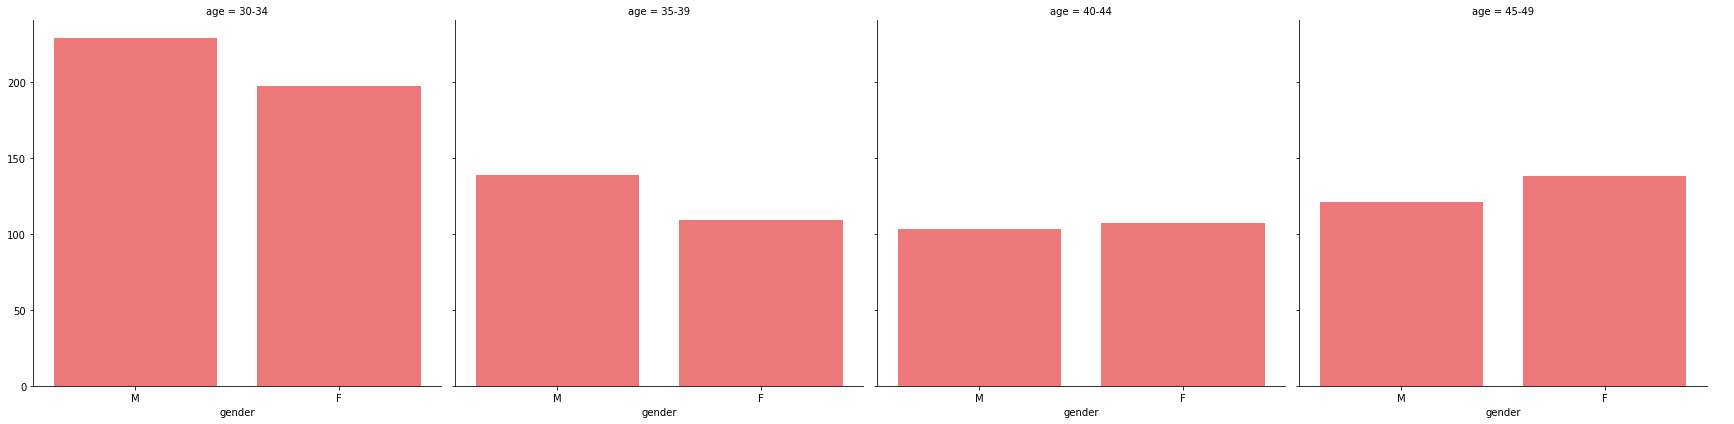

In [50]:
impression_clicks = sns.FacetGrid(col='age', data=df, height=6)
impression_clicks.map(sns.countplot, 'gender', alpha=0.6, color='red')
impression_clicks.add_legend()

 - For ages 30-34 there are more ads shown to males than females
 - For ages 35-39 there are more ads shown to males than females
 - For ages 40-44 there are slightly more ads shown to females than males
 - For ages 45-49 there are more ads shown to females than males

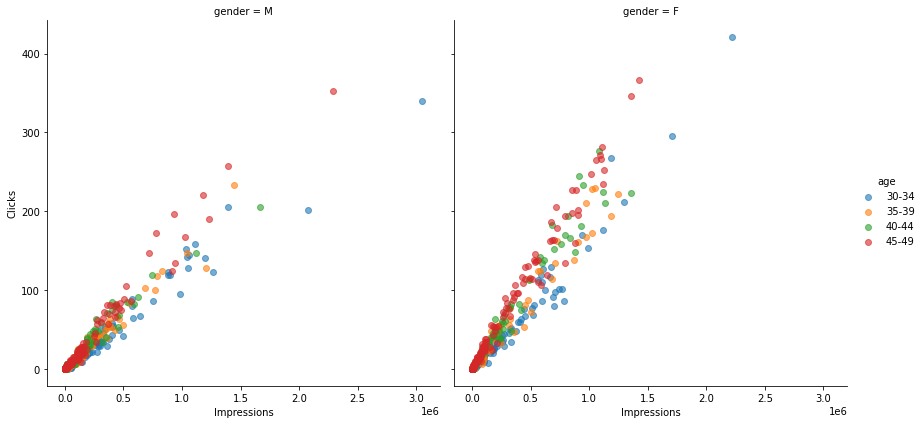

In [23]:
impressions_clicks_scatter = sns.FacetGrid(col='gender', hue='age', data=df, height=6)
impressions_clicks_scatter.map(plt.scatter, 'Impressions', 'Clicks', alpha=0.6)
impressions_clicks_scatter.add_legend()

It appears that females are more likely to click on advertisements than males for all age groups.

Let's find out who is more likely to buy the product once they have clicked on the ad.

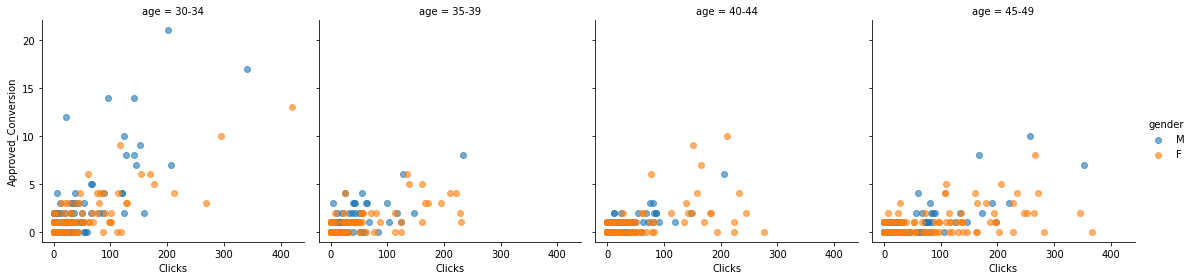

In [27]:
clicks_approved_scatter = sns.FacetGrid(col='age', hue='gender', data=df, height=4)
clicks_approved_scatter.map(plt.scatter, 'Clicks', 'Approved_Conversion', alpha=0.6)
clicks_approved_scatter.add_legend()

It can be seen that males on average are more likely to buy a product after clicking on an ad. This means that advertising teams should focus more on targetting males rather than females to increase their conversion rates. This has not been considered for age groups 40-44 and 45-49 as the amount of female targetted ads is greater than the amount of male targetted ads.

Let's compare the impressions and clicks for all age demographics.

Text(0.5, 1.0, 'Clicks vs Impressions for age demographics')

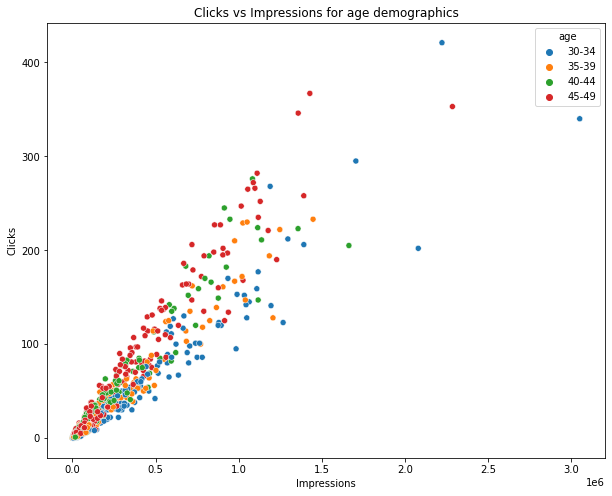

In [72]:
plt.figure(figsize=(10, 8))
impressions_clicks_scatter = sns.scatterplot(x='Impressions', y='Clicks', hue='age', data=df)
impressions_clicks_scatter.set_title('Clicks vs Impressions for age demographics')

It can be seen that there is a trend between the older demographics having a higher click rate than younger demographics. Let's confirm this by plotting a barchart of the clicks for each age demographic.

Text(0.5, 1.0, 'Clicks for each age demographic')

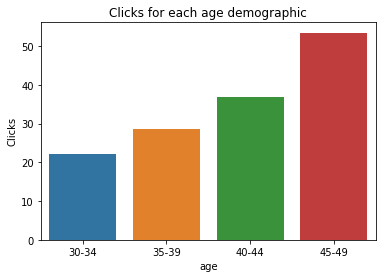

In [74]:
age_clicks_barchart = sns.barplot(x='age', y='Clicks', data=df, ci=None)
age_clicks_barchart.set_title('Clicks for each age demographic')

This proves our hypothesis that the amount of ad clicks increases with the age demographic of the target.

Let's compare the clicks and approved conversions for all age demographics.

Text(0.5, 1.0, 'Clicks vs Approved Conversions for age demographics')

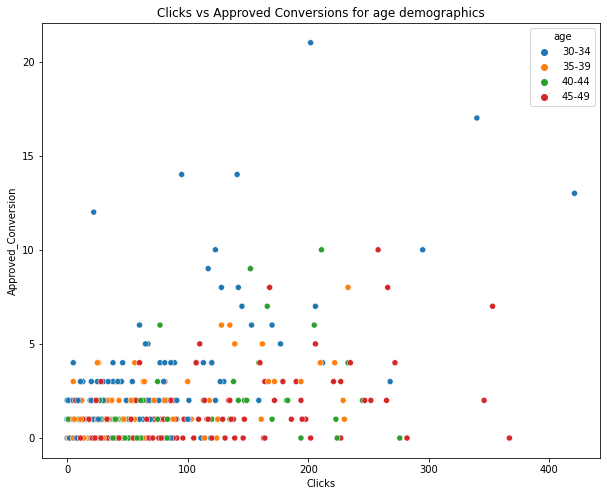

In [76]:
plt.figure(figsize=(10, 8))
clicks_approve_scatter = sns.scatterplot(x='Clicks', y='Approved_Conversion', hue='age', data=df)
clicks_approve_scatter.set_title('Clicks vs Approved Conversions for age demographics')

This is difficult to understand, so let's make a barchart to see the trend between the age demographic and buying a sale.

Text(0.5, 1.0, 'Approved conversions for each age demographic')

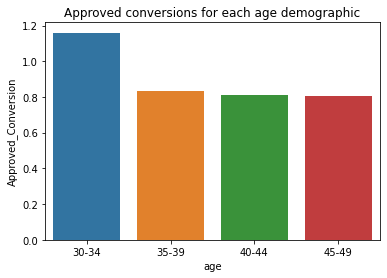

In [77]:
age_approved_barchart = sns.barplot(x='age', y='Approved_Conversion', data=df, ci=None)
age_approved_barchart.set_title('Approved conversions for each age demographic')

It can be seen that 30-34 year olds are most likely to buy a product once they have clicked on the ad, despite having the lowest chance of clicking on the ad. This means that advertisers should market more towards this age demographic and getting them to click the ad, because once they do they have a much greater chance of going through with the purchase. Let's confirm this hypothesis below.

In [84]:
age_grouped_sum = df.groupby('age').sum()
age_grouped_sum['age'] = age_grouped_sum.index
age_grouped_sum['Conversion_Rate'] = age_grouped_sum['Approved_Conversion'] / age_grouped_sum['Clicks']
age_grouped_sum.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,Conversion_Rate,age
age,,,,,,,,,,,
30-34,408217251,446798,55578967,13130,67993019,9483,15252.399986,1431,494,0.052093,30-34
35-39,248991376,267462,33575031,8400,42104644,7094,11112.429994,626,207,0.029180,35-39
40-44,212766296,227658,28775757,7230,39604307,7736,11589.729981,523,170,0.021975,40-44
45-49,258464549,278100,34985345,8692,63732858,13852,20750.669997,684,208,0.015016,45-49


Text(0.5, 1.0, 'Conversion rate for each age demographic')

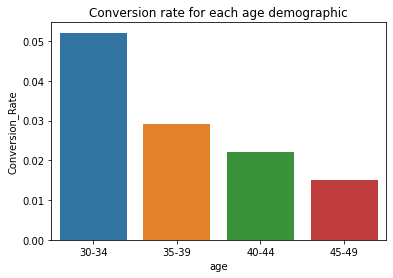

In [86]:
age_conversion_barchart = sns.barplot(x='age', y='Conversion_Rate', data=age_grouped_sum, ci=None)
age_conversion_barchart.set_title('Conversion rate for each age demographic')

Thus it confirms that the 30-34 year old age demographic has the highest conversion rate. It also follows that the conversion rate decreases as the age demographic increases, meaning that advertisers should target their ads at a younger demographic to increase sales.

### What products are people clicking on?

We're going to find out the what the most popular product types are.

In [88]:
# I want to observe the product type distribution for each age demographic for each gender
# To do this I'm going to have an age demographic for each distribution of interests denoted by males and females
# Cost per conversion would be good